In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, cohen_kappa_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer,\
KBinsDiscretizer, OneHotEncoder, QuantileTransformer

In [3]:
df = pd.read_csv('loans.csv')

In [4]:
df.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Applicant_ID           5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Annual_Income          5000 non-null   int64 
 3   Credit_Score           5000 non-null   int64 
 4   Employment_Years       5000 non-null   int64 
 5   Loan_Amount_Requested  5000 non-null   int64 
 6   Default                5000 non-null   object
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.shape

(5000, 7)

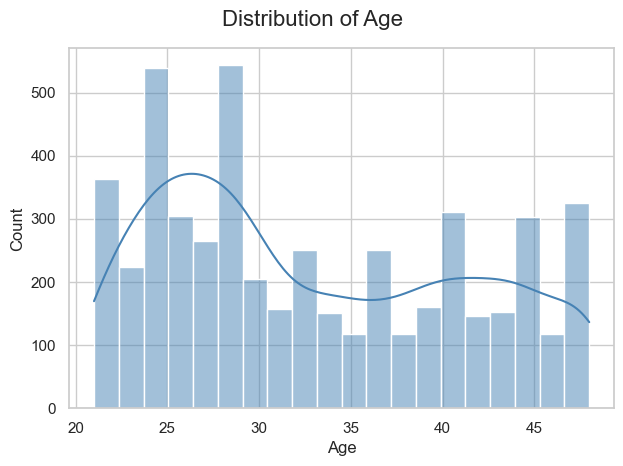

In [7]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
#fig, axes = plt.subplots(2, 1, figsize=(14, 10))
plt.suptitle('Distribution of Age', fontsize=16)

# 2. Seaborn Histogram with KDE
sns.histplot(df['Age'], bins=20, kde=True, color='steelblue')
#plt.title('Seaborn Histogram with KDE')
plt.xlabel('Age')
plt.ylabel('Count')

# Add descriptive statistics to the figure
stats_text = (f"Sample Size: {len(df['Age'])}\n"
              f"Mean Age: {df['Age'].mean():.1f}\n"
              f"Median Age: {np.median(df['Age']):.1f}\n"
              f"Std Dev: {df['Age'].std():.1f}\n"
              f"Min Age: {df['Age'].min()}\n"
              f"Max Age: {df['Age'].max()}")

#fig.text(0.5, 0.02, stats_text, ha='left', 
#         bbox=dict(boxstyle='round', facecolor='ivory', alpha=0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15)
plt.show()

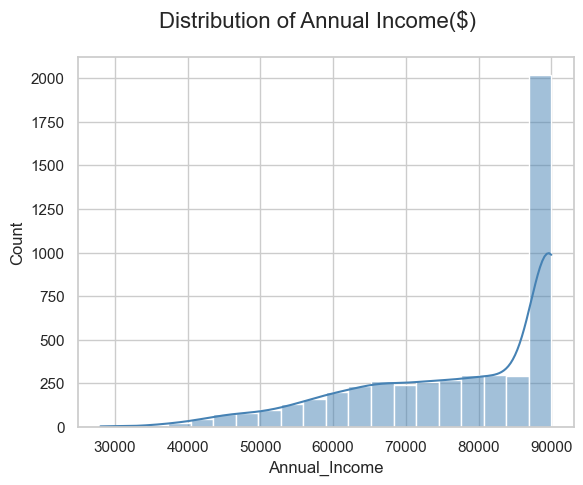

In [8]:
# 2. Seaborn Histogram with KDE
plt.suptitle('Distribution of Annual Income($)', fontsize=16)
sns.histplot(df['Annual_Income'], bins=20, kde=True, color='steelblue')
#plt.title('Seaborn Histogram with KDE')
plt.xlabel('Annual_Income')
plt.ylabel('Count')
plt.show()

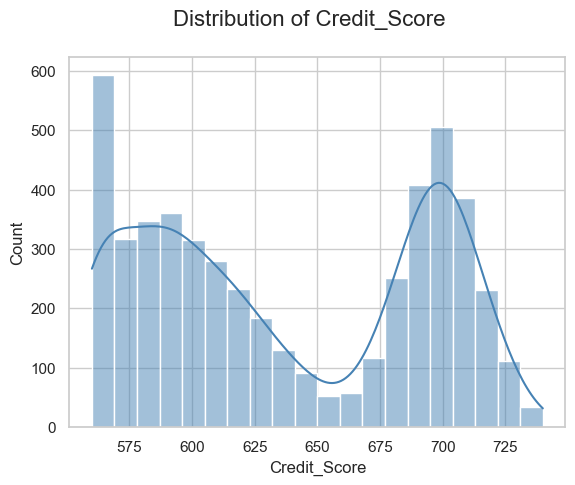

In [9]:
# 2. Seaborn Histogram with KDE
plt.suptitle('Distribution of Credit_Score', fontsize=16)
sns.histplot(df['Credit_Score'], bins=20, kde=True, color='steelblue')
#plt.title('Seaborn Histogram with KDE')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

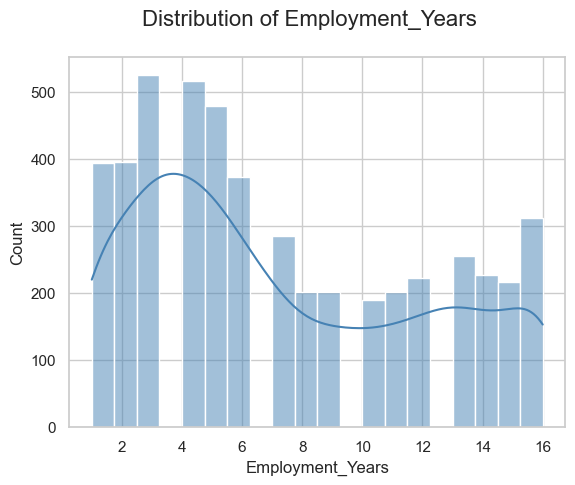

In [11]:
# 2. Seaborn Histogram with KDE
plt.suptitle('Distribution of Employment_Years', fontsize=16)
sns.histplot(df['Employment_Years'], bins=20, kde=True, color='steelblue')
#plt.title('Seaborn Histogram with KDE')
plt.xlabel('Employment_Years')
plt.ylabel('Count')
plt.show()

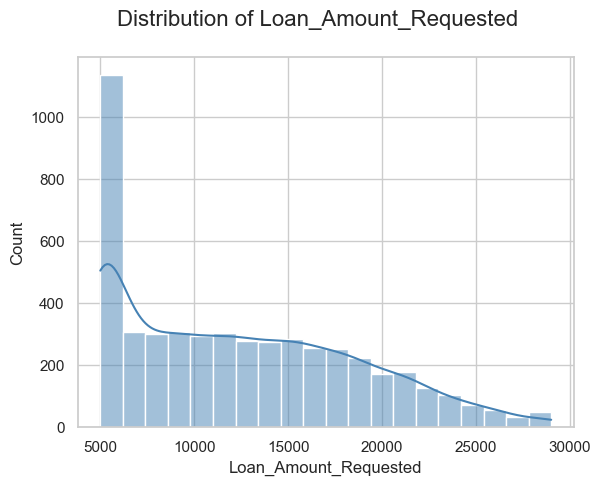

In [12]:
# 2. Seaborn Histogram with KDE
plt.suptitle('Distribution of Loan_Amount_Requested', fontsize=16)
sns.histplot(df['Loan_Amount_Requested'], bins=20, kde=True, color='steelblue')
#plt.title('Seaborn Histogram with KDE')
plt.xlabel('Loan_Amount_Requested')
plt.ylabel('Count')
plt.show()

In [13]:
# Your age groups
age_groups = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Assuming you have a DataFrame with an 'age' column
# Sample DataFrame (replace this with your actual DataFrame)

# Function to assign age group
def assign_age_group(age):
    for group in age_groups:
        lower, upper = map(int, group.split('-'))
        if lower <= age <= upper:
            return group
    return 'Other'  # For ages outside defined groups

# Apply the function to create a new column
df['age_group'] = df['Age'].apply(assign_age_group)

In [14]:
df.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default,age_group
0,10,32,82133,689,1,10789,No,30-39
1,38,30,53172,588,3,5442,Yes,30-39
2,6,31,90000,573,4,5000,Yes,30-39
3,15,29,74634,621,7,16074,Yes,20-29
4,35,36,78232,701,5,17742,No,30-39


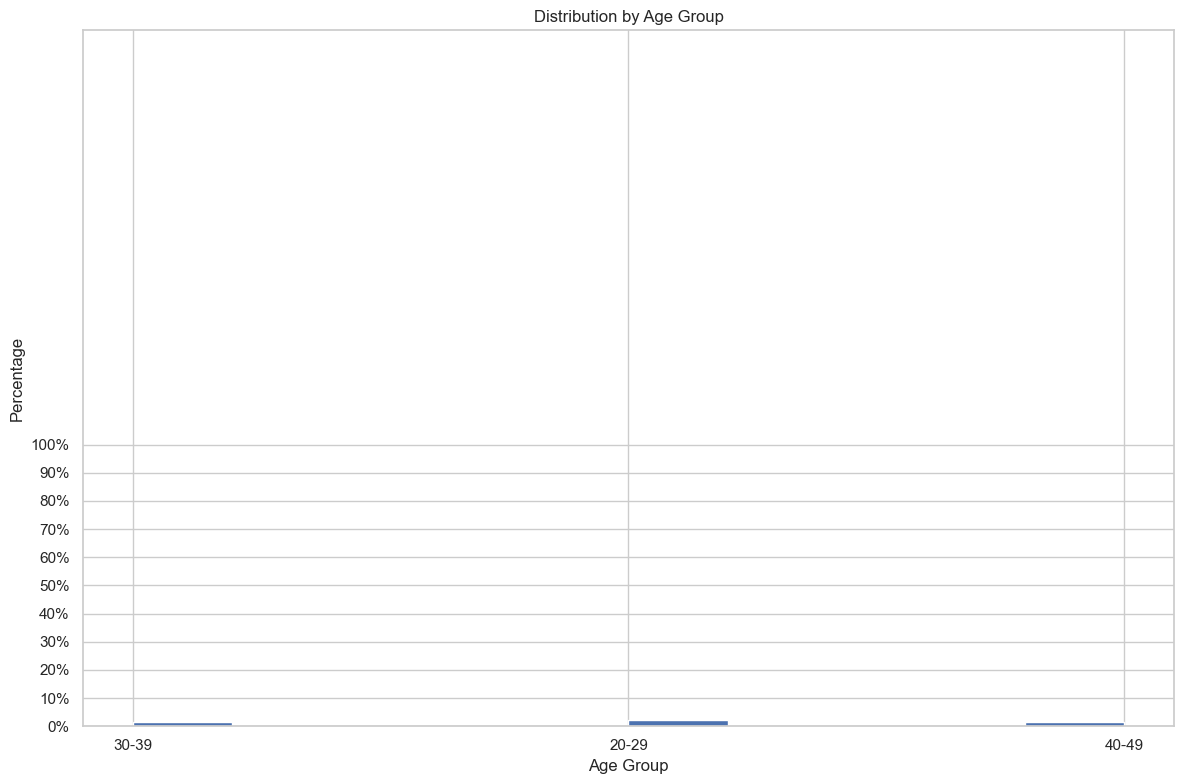

In [15]:
# Create the figure
plt.figure(figsize=(12, 8))

# Create histogram with density=True to normalize
counts, bins, patches = plt.hist(df['age_group'], density=True)

# Scale the y-axis to show percentages (multiply by 100)
# Get the maximum count as a percentage
y_max = np.ceil(max(counts) * 100 * 1.1)  # Add 10% padding

# Set the y-axis to display percentages
plt.gca().set_ylim(0, y_max)
plt.gca().set_yticks(np.arange(0, 101, 10))  # 0% to 100% by 10%
plt.gca().set_yticklabels([f'{int(x)}%' for x in np.arange(0, 101, 10)])

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Distribution by Age Group')

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
df = df.drop('age_group', axis=1)

In [17]:
df.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [18]:
# Features and target variable
X = df.drop(columns=['Default', 'Applicant_ID'])
y = df['Default']

# Columns to be scaled
numeric_features = ['Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']

# Column to be binned and one-hot encoded
categorical_features = ['Age']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ('bin', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [19]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print train and test set shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape, '\n')

# generate predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# test accuracy on X_test
print(accuracy_score(y_test,y_pred))

X_train: (3500, 5)
X_test: (1500, 5)
y_train: (3500,)
y_test: (1500,) 

0.9606666666666667


In [20]:
import modelbit
mb = modelbit.login()

In [22]:
# first define function
def predict_loan_default(Age: int, Annual_Income: float, Credit_Score: int, Employment_Years: float, Loan_Amount_Requested: float)-> float:
   
  """
  Predict the probability of loan default using a pre-trained machine learning pipeline.

  Args:
      Age (int): Applicant's age.
      Annual_Income (float): Applicant's annual income.
      Credit_Score (int): Applicant's credit score.
      Employment_Years (float): Number of years employed.
      Loan_Amount_Requested (float): Requested loan amount.

  Returns:
      float: Probability of loan default.
  """
  
  return pipeline.predict_proba(pd.DataFrame([[Age, Annual_Income, Credit_Score, Employment_Years, Loan_Amount_Requested]],
                                             columns = ['Age', 'Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']))[:,1]                              

### Testing the function

In [23]:
predict_loan_default(32, 821233, 689, 1, 10789)

array([4.14205638e-27])

In [25]:
# deploy predict_loan_default
mb.deploy(predict_loan_default, python_version="3.9")

NameError: name 'tool' is not defined

### Prediction: No Default

In [ ]:
!curl -s -XPOST "https://pycaret.app.modelbit.com/v1/predict_loan_default/latest" -d '{"data": [32, 821233, 689, 1, 10789]}' | json_pp

### Prediction: Default

In [ ]:
!curl -s -XPOST "https://pycaret.app.modelbit.com/v1/predict_loan_default/latest" -d '{"data": [30, 53172, 588, 3, 5442]}' | json_pp

### Using Json or requests

In [ ]:
import requests
import json

url = "https://pycaret.app.modelbit.com/v1/predict_loan_default/latest"
headers = {
    'Content-Type': 'application/json'
}
data = {
    "data": [30, 53172, 588, 3, 5442]
}

response = requests.post(url, headers=headers, json=data)
response_json = response.json()

print(json.dumps(response_json, indent=4))

### Weather API

In [34]:
import random

def predict_weather(days_from_now: int):
    prediction = random.choice(["sunny", "cloudy", "just right"])
    return {
        "weather": prediction,
        "message": f"In {days_from_now} days it will be {prediction}!"
    }

# Add the python_version parameter to your deploy call
mb.deploy(predict_weather, python_version="3.9")  # Choose any version from 3.6-3.12

### Using Another Python Code

In [68]:
# First, define how many days ahead you want to predict
days_from_now = 2

# Then make the API call
result = modelbit.get_inference(
  region="us-east-1.aws",
  workspace="junielgavilansanchez",
  deployment="predict_weather",
  data=[[1, days_from_now], [2, days_from_now]]
)

print(result)

{'data': [[1, {'weather': 'cloudy', 'message': 'In 2 days it will be cloudy!'}], [2, {'weather': 'just right', 'message': 'In 2 days it will be just right!'}]]}


In [69]:
modelbit.get_inference(
  region="us-east-1.aws",
  workspace="junielgavilansanchez",
  deployment="predict_weather",
  data=('3')
)

{'data': {'weather': 'cloudy', 'message': 'In 3 days it will be cloudy!'}}

In [70]:
modelbit.get_inference(
  region="us-east-1.aws",
  workspace="junielgavilansanchez",
  deployment="predict_weather",
  data=('7')
)

{'data': {'weather': 'just right',
  'message': 'In 7 days it will be just right!'}}

### Batch, Bash or Curl

In [ ]:
### Option 1
curl -s -XPOST "https://junielgavilansanchez.us-east-1.aws.modelbit.com/v1/predict_weather/latest" -d \
'{"data": "predict_weather(2)"}' | json_pp


curl -s -XPOST "https://junielgavilansanchez.us-east-1.aws.modelbit.com/v1/predict_weather/latest" -d \
'{"data": "2"}' | json_pp

In [ ]:
### Option 2 
curl -s -XPOST "https://junielgavilansanchez.us-east-1.aws.modelbit.com/v1/predict_weather/latest" -d \
'{"data": "2"}' | json_pp

### PYTHON SINGLE

In [73]:
modelbit.get_inference(
  region="us-east-1.aws",
  workspace="junielgavilansanchez",
  deployment="predict_weather",
  data=('5')
)

{'data': {'weather': 'cloudy', 'message': 'In 5 days it will be cloudy!'}}

In [72]:
modelbit.get_inference(
  region="us-east-1.aws",
  workspace="junielgavilansanchez",
  deployment="predict_weather",
  data=10
)

{'data': {'weather': 'just right',
  'message': 'In 10 days it will be just right!'}}

### PTYHON BATCH

In [60]:
modelbit.get_inference(
  region="us-east-1.aws",
  workspace="junielgavilansanchez",
  deployment="predict_weather",
  data=[[1, days_from_now], [2, days_from_now]]
)

{'data': [[1,
   {'weather': 'cloudy', 'message': 'In 2 days it will be cloudy!'}],
  [2, {'weather': 'sunny', 'message': 'In 2 days it will be sunny!'}]]}